# Homicide Investigations: 2008 - 2014 Analysis
### CIS 9660 - Group FGJP 
Group Members: Francesca Giannetta, James Paguay, Yash Agarwal, Karina Williams

## Introduction
This analysis will focus on the target attribute “Crime Solved” where crimes equal to __"not"__ solved. We believe our classification model will assist in identifying the important variables which correlate strongly with unsolved cases. By knowing which variables lead to unsolved crimes, we can use this information to help train future homicide detectives. They will focus more on these attributes which could lead to a decrease in training cost and reduce the overall number of cases going unsolved.

### Data Cleanup
Before we began our analysis, we cleaned up our columns and rows. As you can see below, this is how we began the cleanup stage.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('database.csv')
df

C:\Conda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [3]:
new_df = df
new_df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

### Cleaning Columns and Dropping Rows
We decided to replace spaces between column names with underscores, to avoid any issues extracting information.
We also saw that there was an empty row within Perpetrator_Age column, so we decided to drop that row.
Lastly, the Perpetrator_Age column was labeled as an object type. We converted it to an integer type since age values should be numeric.

In [4]:
new_df.columns = new_df.columns.str.replace(' ','_')
new_df.drop(df.loc[new_df['Perpetrator_Age'] == ' '].index, inplace = True)
new_df['Perpetrator_Age'] = new_df['Perpetrator_Age'].astype(int)
new_df.dtypes

Record_ID                 int64
Agency_Code              object
Agency_Name              object
Agency_Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime_Type               object
Crime_Solved             object
Victim_Sex               object
Victim_Age                int64
Victim_Race              object
Victim_Ethnicity         object
Perpetrator_Sex          object
Perpetrator_Age           int32
Perpetrator_Race         object
Perpetrator_Ethnicity    object
Relationship             object
Weapon                   object
Victim_Count              int64
Perpetrator_Count         int64
Record_Source            object
dtype: object

### Cleaning Relationship and Weapon

In [5]:
new_df.Relationship.unique()

array(['Acquaintance', 'Unknown', 'Wife', 'Stranger', 'Girlfriend',
       'Ex-Husband', 'Brother', 'Stepdaughter', 'Husband', 'Sister',
       'Friend', 'Family', 'Neighbor', 'Father', 'In-Law', 'Son',
       'Ex-Wife', 'Boyfriend', 'Mother', 'Common-Law Husband',
       'Common-Law Wife', 'Stepfather', 'Stepson', 'Stepmother',
       'Daughter', 'Boyfriend/Girlfriend', 'Employer', 'Employee'],
      dtype=object)

Similarly, relationships are grouped to avoid duplicate and overly granular data.

In [6]:
new_df['Relationship'].replace(['Boyfriend','Girlfriend'], ['Boyfriend/Girlfriend', 'Boyfriend/Girlfriend'], inplace = True)
new_df['Relationship'].replace(['Common-Law Husband','Common-Law Wife'], ['Husband', 'Wife'], inplace = True)
new_df['Relationship'].replace(['Employee','Employer'], ['Colleague', 'Colleague'], inplace = True)
new_df.Relationship.unique()

array(['Acquaintance', 'Unknown', 'Wife', 'Stranger',
       'Boyfriend/Girlfriend', 'Ex-Husband', 'Brother', 'Stepdaughter',
       'Husband', 'Sister', 'Friend', 'Family', 'Neighbor', 'Father',
       'In-Law', 'Son', 'Ex-Wife', 'Mother', 'Stepfather', 'Stepson',
       'Stepmother', 'Daughter', 'Colleague'], dtype=object)

In [7]:
new_df.Weapon.unique()

array(['Blunt Object', 'Strangulation', 'Unknown', 'Rifle', 'Knife',
       'Firearm', 'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
       'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison'], dtype=object)

Similarly, weapons are grouped to avoid duplicate and overly granular data.

In [8]:
new_df['Weapon'].replace(['Firearm', 'Gun', 'Handgun', 'Rifle', 'Shotgun'], ['Firearms', 'Firearms', 'Firearms', 'Firearms', 'Firearms'], inplace = True)
new_df['Weapon'].replace(['Suffocation', 'Strangulation'], ['Asphyxiation', 'Asphyxiation'], inplace = True)
new_df.Weapon.unique()

array(['Blunt Object', 'Asphyxiation', 'Unknown', 'Firearms', 'Knife',
       'Fall', 'Drowning', 'Explosives', 'Fire', 'Drugs', 'Poison'],
      dtype=object)

### Cleaning Victim_Age and Perpetrator_Age
There were 974 records within Victim_Age equaled to 998. A value of 998 meant the age was not reported since the victim was unidentified. Instead of dropping these rows, we decided to imputate those missing values.

First, we converted rows of Victim_Age equal to 998 to NaN (Not a Number). Once this was complete, we used the median age of Victim Ages to replace all records equaled to NaN. We decided to use the median instead of the mean for two issues.

1. The median gave us a floating number rather than a whole number. 
2. More importantly, the mean can be skewed if there are many ages of a certain value (E.g. if there are 10 times more ages of 99 than 30). The median will give us the number which is right in the middle of the range. 

Initially, we filtered all rows where Perpetrator_Ages were less or equal to four. However, the number of records within this constraint was 216,391 records. Meaning we were losing a vast amount of information when we dropped those records. We decided to keep it this time around when running our models.

Below you can see how we fixed our columns.

In [10]:
page = new_df.drop(new_df.loc[new_df['Perpetrator_Age'] >= 4].index)
page.shape
## We decided to not drop these values but keep them instead since it meant losing alot of information.

(216391, 24)

In [9]:
np.sort(new_df.Victim_Age.unique())
## There are values of 998 within our Victim_Age column which should be converted to NaN.

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 998], dtype=int64)

In [11]:
new_df.Victim_Age[new_df.Victim_Age == 998] = np.nan

<ipython-input-11-e25384a00deb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.Victim_Age[new_df.Victim_Age == 998] = np.nan


In [12]:
new_df.isnull().sum()
## Shows 974 records within Victim_Age are missing.

Record_ID                  0
Agency_Code                0
Agency_Name                0
Agency_Type                0
City                       0
State                      0
Year                       0
Month                      0
Incident                   0
Crime_Type                 0
Crime_Solved               0
Victim_Sex                 0
Victim_Age               974
Victim_Race                0
Victim_Ethnicity           0
Perpetrator_Sex            0
Perpetrator_Age            0
Perpetrator_Race           0
Perpetrator_Ethnicity      0
Relationship               0
Weapon                     0
Victim_Count               0
Perpetrator_Count          0
Record_Source              0
dtype: int64

In [13]:
Vage = new_df[['Victim_Age', 'Perpetrator_Age']]

<AxesSubplot:>

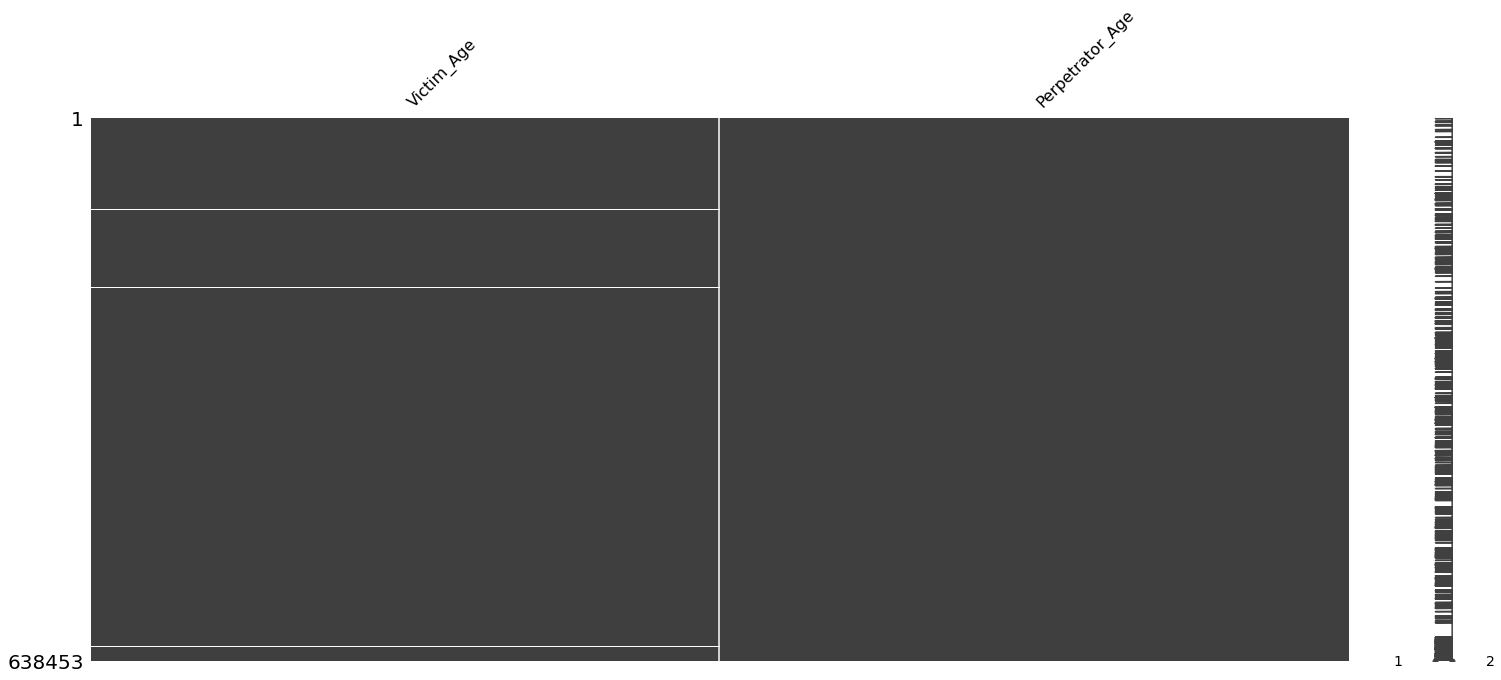

In [14]:
import missingno as msno
msno.matrix(Vage)

**Fig. 1.** Blank spaces show where the missing values are within the column of Victim_Age.

In [15]:
new_df['Victim_Age'].fillna(new_df['Victim_Age'].median(), inplace = True)

In [16]:
print(new_df.isnull().sum())

Record_ID                0
Agency_Code              0
Agency_Name              0
Agency_Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime_Type               0
Crime_Solved             0
Victim_Sex               0
Victim_Age               0
Victim_Race              0
Victim_Ethnicity         0
Perpetrator_Sex          0
Perpetrator_Age          0
Perpetrator_Race         0
Perpetrator_Ethnicity    0
Relationship             0
Weapon                   0
Victim_Count             0
Perpetrator_Count        0
Record_Source            0
dtype: int64


In [17]:
new_df['Victim_Age'] = new_df['Victim_Age'].astype(int)
print(np.sort(new_df.Victim_Age.unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [18]:
## model_df will be use for our baseline models later on in our analysis.
model_df = new_df

### Last Data Cleanup Step
Instead of dropping the columns of Record ID, Agency Code, Agency Name, Agency Type, City, Victim Count, Perpetrator Count
and Incident, we can just leave them out for our predictors. 

But this concludes the data cleanup stage. Next step is Exploratory Analysis.

## Exploratory Data Analysis

By analyzing the available data, our group aims to gain insights into crimes that have been solved by focusing specifically on the variable "Crimes Solved", as well as those that remain unsolved, to identify the characteristics that contribute to that outcome.

We believe this information will be pivotal for future criminal investigations and analysis to help further solve crimes.

In [19]:
predictors = ['State','Year','Month','Crime_Type','Victim_Sex','Victim_Age',
              'Victim_Race','Victim_Ethnicity','Perpetrator_Sex','Perpetrator_Age','Perpetrator_Race',
              'Perpetrator_Ethnicity','Relationship','Weapon','Record_Source']
outcome = 'Crime_Solved'

Before building the baseline and final models, the relationship between our assumed predictors is explored to identify potential gaps and correlations that were not visible in reviewing the dataset in csv form. 

In [21]:
# Frequency of the Target Variable - Crime_Solved
new_df[outcome].value_counts()

Yes    448172
No     190281
Name: Crime_Solved, dtype: int64

In [22]:
# Frequency of different Perpetrator_Race counts
new_df.Perpetrator_Race.value_counts()

White                            218243
Black                            214516
Unknown                          196046
Asian/Pacific Islander             6046
Native American/Alaska Native      3602
Name: Perpetrator_Race, dtype: int64

In [23]:
# Frequency of different Crime_Type counts
new_df.Crime_Type.value_counts()

Murder or Manslaughter        629337
Manslaughter by Negligence      9116
Name: Crime_Type, dtype: int64

In [24]:
# Ensuring our target variable is not null and was not missed in cleanup
new_df[new_df[outcome].isnull()]

,Record_ID,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,...,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source


In [25]:
# We need to ensure the attribute Crime_Solved as categorical variable since we are building a classification model
new_df[outcome] = new_df[outcome].astype('category')
new_df[outcome].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

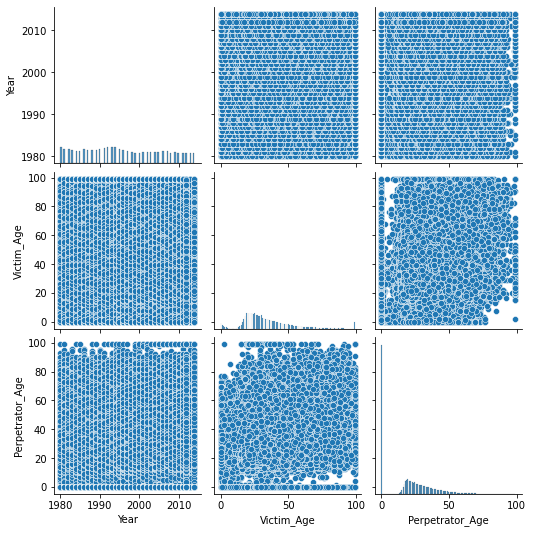

In [26]:
#Exploring the Relationship between variables

sns.pairplot(new_df[predictors])

**Fig. 2.** Pairplot graphs of numerical attributes

Using the pairplot function we look for high level relationships between the different attributes available in our currently assumed predictors. This implies a significant relationship between victim age and perpetrator age that need to be explored. 

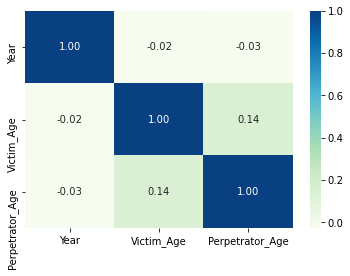

In [28]:
corr = new_df[predictors].corr()
plt.autoscale()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="GnBu")
plt.show()

**Fig. 3.** Heatmap relationship graph as part of initial EDA

The heatmap (Fig. 3) suggests that there is a weak relationship between Victim Age and Perpetrator Age. 

We then wanted to look at the relationship between Age and Race for Solved and Unsolved crimes. We looked at the relationship for both the Victim and the Perpetrator.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Native American/Alaska Native'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Asian/Pacific Islander')])

<Figure size 576x576 with 0 Axes>

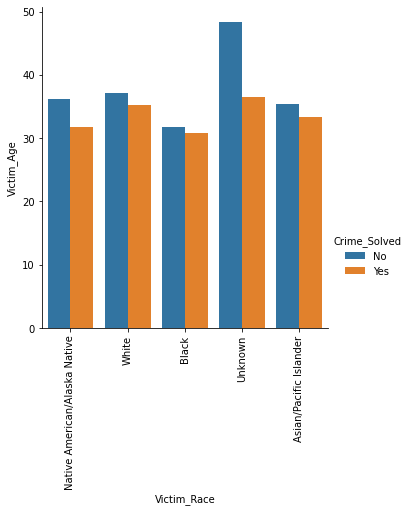

In [29]:
plt.figure(figsize=(8, 8))
sns.catplot(data=new_df,x='Victim_Race',y='Victim_Age',kind='bar',hue="Crime_Solved", ci = None)
plt.xticks(rotation = 90)

#Exploring if the relationship between solved / unsolved cases related to certain victim races or age ranges 

**Fig. 4.** Bar graph exploring the correlation, if any, between the desired outcome, victim age and victim race.

There appears to be no significant relationship between Victim_Age and Victim_Race in affecting crimes being solved or unsolved. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Native American/Alaska Native'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Black'),
  Text(4, 0, 'Asian/Pacific Islander')])

<Figure size 576x576 with 0 Axes>

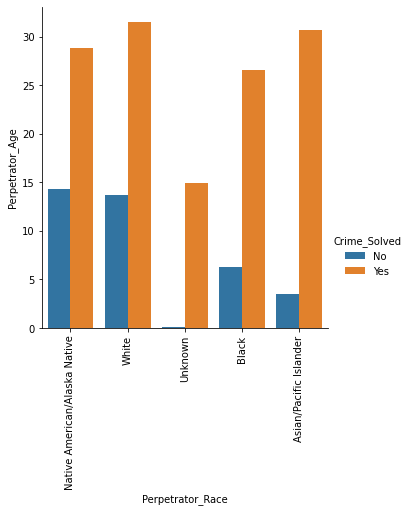

In [30]:
plt.figure(figsize=(8, 8))
sns.catplot(data=new_df,x='Perpetrator_Race',y='Perpetrator_Age',kind='bar',hue="Crime_Solved", ci = None)
plt.xticks(rotation = 90)

#Exploring if the relationship between solved / unsolved cases related to certain perpetrator races or age ranges 

**Fig. 5** Bar graph exploring the correlation, if any, between the desired outcome, perpetrator age and perpetrator race.

Cases are most likely to be unsolved where the perpetrator race is unknown.  This can be confirmed in the model, but at first glance it can be implied that greater investment in dna research and other tools that can be used to identify race can have a greater impact on the improved outcome of cases. 

(0.0, 99.0)

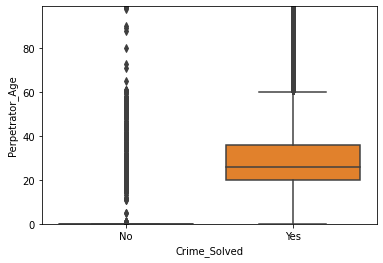

In [31]:
sns.boxplot(data = df, x = 'Crime_Solved', y = 'Perpetrator_Age')
plt.ylim((0, 99))

**Fig. 6** BoxPlot mapping Perpetrator Age against the desired outcome

The average age of the perpetrators in both solved and unsolved cases appears to be similar but there is an obvious and significantly wider range of outliers above the upper quartile age of the 'solved' cases box.  Also, the upper quartile whisker of the perpetrator ages in unsolved cases is wider.  It was decided that removing outliers at this point may result in greater issues than removing them due to the large cluster and the team would prefer to exercise caution in avoiding overfitting this early in the data exploration. 

(0.0, 99.0)

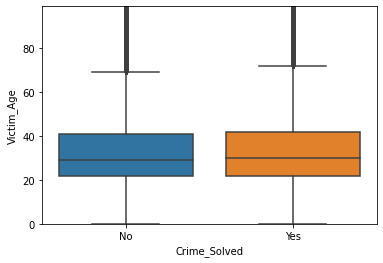

In [32]:
sns.boxplot(data = df, x = 'Crime_Solved', y = 'Victim_Age')
plt.ylim((0, 99))

**Fig. 7** BoxPlot mapping Victim Age against the desired outcome

Similarly, there appears to be no significant relationship or differences in cases being solved or not with the age of the victims.  However, the boxplot view does provide greater insight into a larger number of outliers outside of the upper quartile values for victim ages in solved cases versus the outliers that exist in the data for unsolved cases.

### Feature Engineering

In reviewing available model types and the accuracy of numerical models vs categorical models it was decided to further explore the benefits of converting the data to numerical types to acertain which model type would be most useful and provide the most accurate outcome. 

In [29]:
#getting total columns
cols = new_df.columns
print("Total Columns in dataset are: ",list(cols))
print("")

#getting only numerical columns
numerical_cols=new_df._get_numeric_data().columns
print("Numerical Columns in dataset are: ",list(numerical_cols))
print("")

#getting categorical columns by substracting numerical columns from total columns
categorical_cols=set(list(cols))-set(list(numerical_cols))
print("Categorical Columns in dataset are: ",list(categorical_cols))

Total Columns in dataset are:  ['Record_ID', 'Agency_Code', 'Agency_Name', 'Agency_Type', 'City', 'State', 'Year', 'Month', 'Incident', 'Crime_Solved', 'Victim_Age', 'Victim_Race', 'Perpetrator_Age', 'Perpetrator_Race', 'Relationship', 'Weapon', 'Victim_Count', 'Perpetrator_Count', 'Perpetrator_Ethnicity_Hispanic', 'Perpetrator_Ethnicity_Not Hispanic', 'Perpetrator_Ethnicity_Unknown', 'Record_Source_FBI', 'Record_Source_FOIA', 'Crime_Type_Manslaughter by Negligence', 'Crime_Type_Murder or Manslaughter', 'Victim_Sex_Female', 'Victim_Sex_Male', 'Victim_Sex_Unknown', 'Victim_Ethnicity_Hispanic', 'Victim_Ethnicity_Not Hispanic', 'Victim_Ethnicity_Unknown', 'Perpetrator_Sex_Female', 'Perpetrator_Sex_Male', 'Perpetrator_Sex_Unknown']

Numerical Columns in dataset are:  ['Record_ID', 'Agency_Code', 'Agency_Name', 'Agency_Type', 'City', 'State', 'Year', 'Month', 'Incident', 'Victim_Age', 'Victim_Race', 'Perpetrator_Age', 'Perpetrator_Race', 'Relationship', 'Weapon', 'Victim_Count', 'Perpetrato

In [30]:
#Converting Categorical Columns to Numerical 
le = preprocessing.LabelEncoder()
for i in categorical_cols:
    if i=='Crime_Solved':
        continue
    #if length of unique values of categorical columns is greater than 4 then do label encoding so that columns don't get too big
    if len(new_df[i].value_counts())>4:

        #encoding  categorical variables to numerical values
        new_df[i] = le.fit_transform(new_df[i].values)

    #if length of unique values of categorical columns is less than equal to 4 then do one-hot encoding
    elif len(new_df[i].value_counts())<=4:
        
        #One-Hot Encoding Columns
        new_df = pd.get_dummies(new_df, columns = [i])

In [31]:
#getting total columns
cols=new_df.columns
print("Total Columns in dataset are: ",list(cols))
print("")

#getting only numerical columns
numerical_cols=new_df._get_numeric_data().columns
print("Numerical Columns in dataset are: ",list(numerical_cols))
print("")

#getting categorical columns by substracting numerical columns from total columns
categorical_cols=set(list(cols))-set(list(numerical_cols))
print("Categorical Columns in dataset are: ",list(categorical_cols))

Total Columns in dataset are:  ['Record_ID', 'Agency_Code', 'Agency_Name', 'Agency_Type', 'City', 'State', 'Year', 'Month', 'Incident', 'Crime_Solved', 'Victim_Age', 'Victim_Race', 'Perpetrator_Age', 'Perpetrator_Race', 'Relationship', 'Weapon', 'Victim_Count', 'Perpetrator_Count', 'Perpetrator_Ethnicity_Hispanic', 'Perpetrator_Ethnicity_Not Hispanic', 'Perpetrator_Ethnicity_Unknown', 'Record_Source_FBI', 'Record_Source_FOIA', 'Crime_Type_Manslaughter by Negligence', 'Crime_Type_Murder or Manslaughter', 'Victim_Sex_Female', 'Victim_Sex_Male', 'Victim_Sex_Unknown', 'Victim_Ethnicity_Hispanic', 'Victim_Ethnicity_Not Hispanic', 'Victim_Ethnicity_Unknown', 'Perpetrator_Sex_Female', 'Perpetrator_Sex_Male', 'Perpetrator_Sex_Unknown']

Numerical Columns in dataset are:  ['Record_ID', 'Agency_Code', 'Agency_Name', 'Agency_Type', 'City', 'State', 'Year', 'Month', 'Incident', 'Victim_Age', 'Victim_Race', 'Perpetrator_Age', 'Perpetrator_Race', 'Relationship', 'Weapon', 'Victim_Count', 'Perpetrato

The desired attributes and outcome have all been converted to numerical datatypes.  To ensure no data has been lost or corrupted a quick check of the outcome value counts is done comparing the counts before and after conversion. 

In [32]:
#crime solved values before conversion
new_df.Crime_Solved.value_counts()

Yes    448172
No     190281
Name: Crime_Solved, dtype: int64

In [33]:
#converting target feature
new_df['Crime_Solved']=new_df['Crime_Solved'].apply(lambda x: 1 if x=='Yes' else 0)

In [34]:
#crime solved values after conversion
new_df.Crime_Solved.value_counts()

1    448172
0    190281
Name: Crime_Solved, dtype: int64

An updated heatmap is created to compare the relationship between the newly converted numerical type attributes to see what (if any) changes this conversion has on the correlation.  N.B. the additional columns 'Record ID', Agency Code' etc.  were not removed in this heatmap simply as a confirmation of the previous determination that these will serve as less useful attributes within final models. 

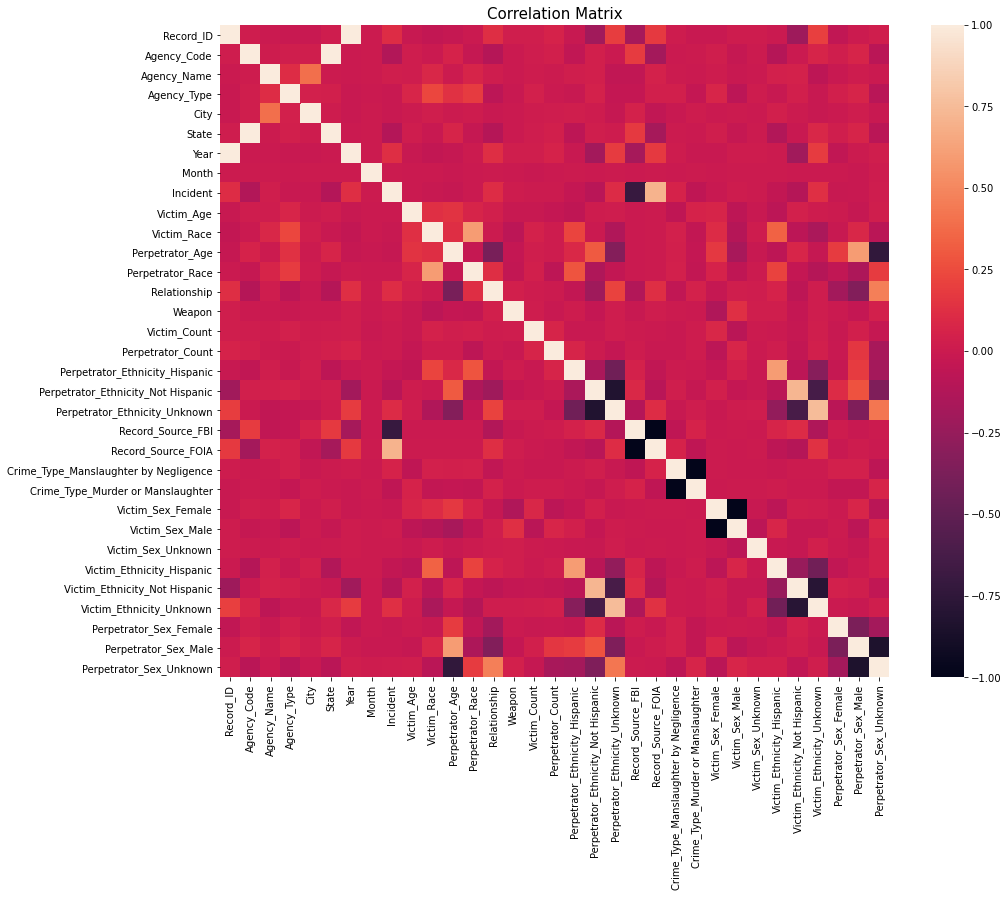

In [35]:
#Correlation Matrix to see correlation between features
plt.figure(figsize=(15,12))
corr=new_df.corr()
plt.title("Correlation Matrix",fontsize="15")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

**Fig. 8** Correlation Matrix of the numerical variables initialized in feature engineering

### Correlation Matrix Analysis
Based on above figure, we can see that light areas are those where correlation between columns is high, 
so state and agency_code are highly correlated and keeping one of them is enough.

In [36]:
new_df.drop(['Agency_Code'], axis=1,inplace=True)

In [37]:
x = new_df.drop(['Crime_Solved', 'Record_ID'],axis=1) #training features
y = new_df['Crime_Solved'] # target variable

In [38]:
#splitting data into train and test sets
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
##you can delete this cell if you want to use all features (tried running the model with selected features vs all features
# and the result was the same)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

#only using 10 best features
x=new_df[['Perpetrator_Sex_Unknown','Perpetrator_Sex_Male','Perpetrator_Age','Relationship','Perpetrator_Ethnicity_Unknown','Perpetrator_Ethnicity_Not Hispanic','Perpetrator_Sex_Female','Perpetrator_Race','Perpetrator_Ethnicity_Hispanic','Perpetrator_Count']]

                                 Specs         Score
30             Perpetrator_Sex_Unknown  3.369445e+08
29                Perpetrator_Sex_Male  1.243774e+06
9                      Perpetrator_Age  6.038541e+05
11                        Relationship  1.424013e+05
17       Perpetrator_Ethnicity_Unknown  1.128355e+05
16  Perpetrator_Ethnicity_Not Hispanic  7.197197e+04
28              Perpetrator_Sex_Female  1.859533e+04
10                    Perpetrator_Race  1.785491e+04
15      Perpetrator_Ethnicity_Hispanic  1.776252e+04
14                   Perpetrator_Count  1.468629e+04


In [40]:
x['Relationship'].unique()

array([ 0, 21, 22, 20,  1,  5,  2, 16, 10, 14,  9,  7, 13,  8, 11, 15,  6,
       12, 17, 19, 18,  4,  3])

In [41]:
#converting to numpy array
X_train= np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

After observing data categorically and numerically, it was decided that the team should move forward with the planned categorical model instead of a numerical model as there are concerns of overfitting the model in over-tailoring the attributes to suit our needs.  There are also concerns that the expanded attributes may warp the findings and required additional legwork in creating legends to account for each of the updated dummy variables (e.g. the 23 'Relationship' tag types that range from 0 to 22).

In [42]:
#normalizing features so that all are in same range so that model runs efficiently
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

### Creating Baseline Model

When creating our baseline models we have to do several things that you can see below. 

First, we use our model_df to build our baseline models since our new_df dataframe changed during the feature engineering process. 

Next, we create dummy variables for our predictors since the Decision Tree Model does not work with string (object) 
attributes. Then, we set our target variable "Crime_Solved" as categorical. Since it was labeled as "No" and "Yes", 
we decide to categorize it as a binary dummy variable, so we use pd.get_dummies() on it as well. This sets "No" as 0 and
"Yes" as 1. 

Lastly, we reconfirm how many values we have for "Crime_Solved" = 0, which is our target variable.

In [43]:
model_df.head()

,Record_ID,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,...,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
0,1,0,149,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,2,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,0,149,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,4,Unknown,Acquaintance,Asphyxiation,0,0,FBI
2,3,0,149,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,3,Unknown,Unknown,Unknown,0,0,FBI
3,4,0,149,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,4,Unknown,Acquaintance,Asphyxiation,0,0,FBI
4,5,0,149,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,3,Unknown,Unknown,Unknown,0,1,FBI


### Creating Dummies and Setting Target Variable as Categorical

In [44]:
model_df['Perpetrator_Sex'] = pd.get_dummies(model_df['Perpetrator_Sex'], prefix_sep='_', drop_first=True)
model_df['Victim_Sex'] = pd.get_dummies(model_df['Victim_Sex'], prefix_sep='_', drop_first=True)
model_df['State'] = pd.get_dummies(model_df['State'], drop_first=True)
model_df['Month'] = pd.get_dummies(model_df['Month'], prefix_sep='_', drop_first=True)
model_df['Crime_Type'] = pd.get_dummies(model_df['Crime_Type'], prefix_sep='_', drop_first=True)
model_df['Victim_Race'] = pd.get_dummies(model_df['Victim_Race'], prefix_sep='_', drop_first=True)
model_df['Victim_Ethnicity'] = pd.get_dummies(model_df['Victim_Ethnicity'], prefix_sep='_', drop_first=True)
model_df['Perpetrator_Race'] = pd.get_dummies(model_df['Perpetrator_Race'], prefix_sep='_', drop_first=True)
model_df['Perpetrator_Ethnicity'] = pd.get_dummies(model_df['Perpetrator_Ethnicity'], prefix_sep='_', drop_first=True)
model_df['Relationship'] = pd.get_dummies(model_df['Relationship'], prefix_sep='_', drop_first=True)
model_df['Weapon'] = pd.get_dummies(model_df['Weapon'], prefix_sep='_', drop_first=True)
model_df['Record_Source'] = pd.get_dummies(model_df['Record_Source'], prefix_sep='_', drop_first=True)

In [46]:
model_df.dtypes

Record_ID                   int64
Agency_Code                 int32
Agency_Name                 int32
Agency_Type                object
City                       object
State                       uint8
Year                        int64
Month                       uint8
Incident                    int64
Crime_Type                  uint8
Crime_Solved             category
Victim_Sex                  uint8
Victim_Age                  int32
Victim_Race                 uint8
Victim_Ethnicity            uint8
Perpetrator_Sex             uint8
Perpetrator_Age             int32
Perpetrator_Race            uint8
Perpetrator_Ethnicity       uint8
Relationship                uint8
Weapon                      uint8
Victim_Count                int64
Perpetrator_Count           int64
Record_Source               uint8
dtype: object

In [47]:
model_df['Crime_Solved'] = pd.get_dummies(model_df['Crime_Solved'], prefix_sep='_', drop_first=True)
model_df['Crime_Solved'] = model_df['Crime_Solved'].astype('category')
model_df.dtypes

Record_ID                   int64
Agency_Code                 int32
Agency_Name                 int32
Agency_Type                object
City                       object
State                       uint8
Year                        int64
Month                       uint8
Incident                    int64
Crime_Type                  uint8
Crime_Solved             category
Victim_Sex                  uint8
Victim_Age                  int32
Victim_Race                 uint8
Victim_Ethnicity            uint8
Perpetrator_Sex             uint8
Perpetrator_Age             int32
Perpetrator_Race            uint8
Perpetrator_Ethnicity       uint8
Relationship                uint8
Weapon                      uint8
Victim_Count                int64
Perpetrator_Count           int64
Record_Source               uint8
dtype: object

In [48]:
model_df['Crime_Solved']

0         1
1         1
2         0
3         1
4         0
         ..
638449    0
638450    1
638451    1
638452    1
638453    1
Name: Crime_Solved, Length: 638453, dtype: category
Categories (2, uint64): [0, 1]

In [53]:
model_df["Crime_Solved"].value_counts()

1    448172
0    190281
Name: Crime_Solved, dtype: int64

### Decision Tree Model

In [49]:
from sklearn.model_selection import train_test_split
predictors2 = ['State', 'Month', 'Crime_Type', 'Victim_Sex', 'Victim_Age', 'Victim_Race', 'Victim_Ethnicity', 
               'Perpetrator_Sex', 'Perpetrator_Age', 'Perpetrator_Race', 'Perpetrator_Ethnicity', 'Relationship',
              'Weapon', 'Record_Source']
outcome2 = 'Crime_Solved'

x = model_df[predictors2]
y = model_df[outcome2]

# partition data
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)
print('Training set:', train_x.shape, 'Validation set:', valid_x.shape)

Training set: (446917, 14) Validation set: (191536, 14)


In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4)

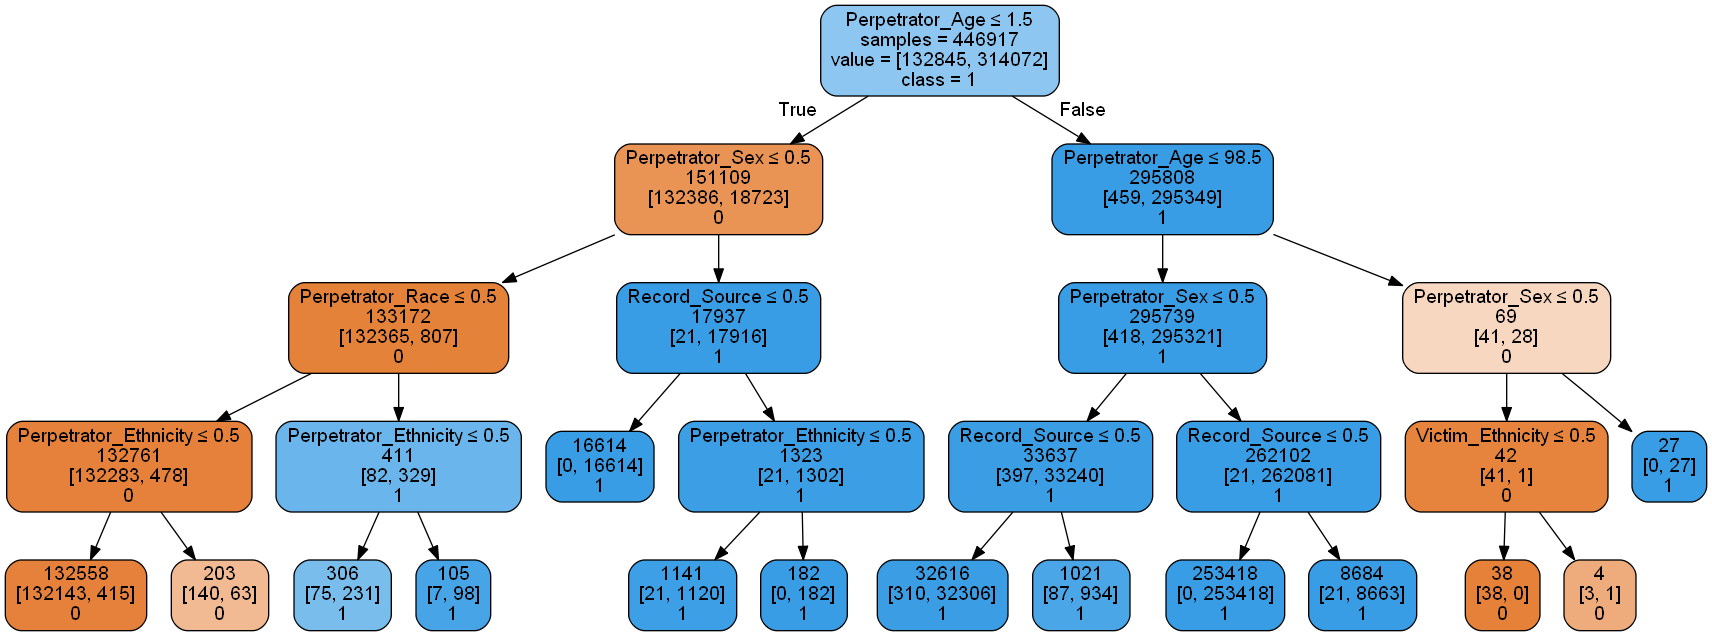

In [51]:
from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary

plotDecisionTree(dt, feature_names=model_df[predictors2].columns, class_names=dt.classes_)

**Fig. 9** Homicide Data Decision Tree Model

In [52]:
importances = dt.feature_importances_
varimp = pd.DataFrame({'feature': train_x.columns, 'importance': importances})
varimp = varimp.sort_values('importance', ascending = False)
print(varimp)

                  feature  importance
8         Perpetrator_Age    0.828067
7         Perpetrator_Sex    0.168815
9        Perpetrator_Race    0.002816
10  Perpetrator_Ethnicity    0.000235
13          Record_Source    0.000065
6        Victim_Ethnicity    0.000002
0                   State    0.000000
1                   Month    0.000000
2              Crime_Type    0.000000
3              Victim_Sex    0.000000
4              Victim_Age    0.000000
5             Victim_Race    0.000000
11           Relationship    0.000000
12                 Weapon    0.000000


As noted in earlier EDA steps perpetrator details serve a greater importance in the outcome of cases and so have  a greater weighted importance in predicting the outcome of cases in our training and test models.

In [53]:
classificationSummary(train_y, dt.predict(train_x))
classificationSummary(valid_y, dt.predict(valid_x))

Confusion Matrix (Accuracy 0.9978)

       Prediction
Actual      0      1
     0 132324    521
     1    479 313593
Confusion Matrix (Accuracy 0.9980)

       Prediction
Actual      0      1
     0  57234    202
     1    190 133910


In [54]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
print("Performance on train set")
print("Accuracy:",accuracy_score(train_y, dt.predict(train_x)))
print("precision score: ", precision_score(train_y,dt.predict(train_x)))
print("recall score: ", recall_score(train_y,dt.predict(train_x)))
print("f1-score: ", f1_score(train_y,dt.predict(train_x)))

Performance on train set
Accuracy: 0.9977624480608256
precision score:  0.9983413665102479
recall score:  0.9984748720038717
f1-score:  0.998408114794026


In [55]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
print("Performance on valid set")
print("Accuracy:",accuracy_score(valid_y, dt.predict(valid_x)))
print("precision score: ", precision_score(valid_y,dt.predict(valid_x)))
print("recall score: ", recall_score(valid_y,dt.predict(valid_x)))
print("f1-score: ", f1_score(valid_y,dt.predict(valid_x)))

Performance on valid set
Accuracy: 0.9979533873527692
precision score:  0.9984937962300167
recall score:  0.9985831469052946
f1-score:  0.9985384695688486


### Logistic Regression Model

In [56]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logit = LogisticRegression(penalty="l2", solver='liblinear')
logit.fit(train_x, train_y)

print('intercept ', logit.intercept_[0],'\n')
pd.DataFrame({'coeff': logit.coef_[0]}, index=x.columns).sort_values(by = 'coeff', ascending = False)

intercept  -1.6930442352603077 



,coeff
Perpetrator_Sex,9.369128
Perpetrator_Race,5.632499
Perpetrator_Ethnicity,3.502494
Relationship,1.580811
Weapon,0.652468
Perpetrator_Age,0.273815
Record_Source,0.062222
State,0.011793
Month,-0.000428
Victim_Age,-0.015422


Similar to the outcome of the decision tree model perpetrator sex and race are deemed as having a large importance in determining the resolution of cases.  However, unlike the decision tree model perpetrator age is showing as having a negative impact with ethnicity serving as a top 5 determining factor.  We can move forward confident that changes to training in regards to perpetrator age and sex can result in improved case resolution statistics but we should adhere to the more accurate model to determine the other factors. 

In [57]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
print("Performance on train set")
print("Accuracy:",accuracy_score(train_y, logit.predict(train_x)))
print("precision score: ", precision_score(train_y,logit.predict(train_x)))
print("recall score: ", recall_score(train_y,logit.predict(train_x)))
print("f1-score: ", f1_score(train_y,logit.predict(train_x)))

Performance on train set
Accuracy: 0.9970173432650805
precision score:  0.9985111884032097
recall score:  0.9972426704704653
f1-score:  0.9978765262965058


In [58]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
print("Performance on valid set")
print("Accuracy:",accuracy_score(valid_y, logit.predict(valid_x)))
print("precision score: ", precision_score(valid_y,logit.predict(valid_x)))
print("recall score: ", recall_score(valid_y,logit.predict(valid_x)))
print("f1-score: ", f1_score(valid_y,logit.predict(valid_x)))

Performance on valid set
Accuracy: 0.9971389190543815
precision score:  0.9986185988859186
recall score:  0.9972930648769575
f1-score:  0.997955391721575


### Naive Bayes 

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

nb = GaussianNB()
nb.fit(train_x,train_y)

prediction_train = nb.predict_proba(train_x)
prediction_valid = nb.predict_proba(valid_x)
    
NB_varimportance_0 = pd.DataFrame({'attribute': train_x.columns, 'importance': nb.theta_[0]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
4,Victim_Age,34.348609
2,Crime_Type,0.997930
3,Victim_Sex,0.822221
5,Victim_Race,0.532101
6,Victim_Ethnicity,0.273514
8,Perpetrator_Age,0.128767
1,Month,0.090692
12,Weapon,0.082954
13,Record_Source,0.031593
0,State,0.001551


In [60]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
print("Performance on train set")
print("Accuracy:",accuracy_score(train_y, nb.predict(train_x)))
print("precision score: ", precision_score(train_y,nb.predict(train_x)))
print("recall score: ", recall_score(train_y,nb.predict(train_x)))
print("f1-score: ", f1_score(train_y,nb.predict(train_x)))

Performance on train set
Accuracy: 0.9958694791202841
precision score:  0.9959400473978817
recall score:  0.9981914974910212
f1-score:  0.9970645014582082


In [61]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
print("Performance on valid set")
print("Accuracy:",accuracy_score(valid_y, nb.predict(valid_x)))
print("precision score: ", precision_score(valid_y,nb.predict(valid_x)))
print("recall score: ", recall_score(valid_y,nb.predict(valid_x)))
print("f1-score: ", f1_score(valid_y,nb.predict(valid_x)))

Performance on valid set
Accuracy: 0.9961260546320274
precision score:  0.9962268925073676
recall score:  0.9982475764354959
f1-score:  0.9972362108525284


## Conclusion 
Our three models are highly accurate and good for predicting the outcome variable. This can be seen by the accuracy measures they produced, which are all high scores. However, there is one accuracy metric which stands out from all the rest and that is the recall score for our decision tree model. It is the highest score for both our training and test sets (recall score of 0.9985831469052946).  

As such the most important variables in determining an outcome of unsolved crimes of investigations are Perpetrator_Age, Perpetrator_Sex, Perpetrator_Race, Perpetrator_Ethnicity, Record_Source, and Victim_Ethnicity, as determined by the levels of importance.

Suggestions for improvements in research and training should be focused on these attributes to improve the outcome of investigations and increase the likelihood of cases being solved. 

# Post Model Analysis 
As we investigated our accuracy measures, we realized they all were relatively high, even across different models. This could be a sign of several mistakes done when modeling. It’s very rare for the accuracy measures to be so high and close to 1. 

We decided to plot the most important attributes based on all three models against our target variable, Crime_Solved.

We wanted to see if we could visualize any discrepancies to further understand why our accuracy measures are so high.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

<Figure size 720x576 with 0 Axes>

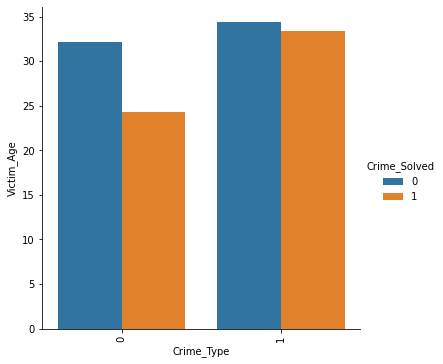

In [67]:
plt.figure(figsize=(10, 8))
sns.catplot(data=model_df,x='Crime_Type',y='Victim_Age',kind='bar',hue="Crime_Solved", ci = None)
plt.xticks(rotation = 90)

**Fig. 10** Bar Chart Comparison of Important Attributes Victim Age against Crime Type

In [68]:
model_df.Crime_Type.value_counts()

1    629337
0      9116
Name: Crime_Type, dtype: int64

Using the information derived from in the value_counts done in the cleanup field the values of fig 10 are:
- 1 [Murder or Manslaughter] = 629337 
-0 [Manslaughter by Negligence] = 9116

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

<Figure size 720x576 with 0 Axes>

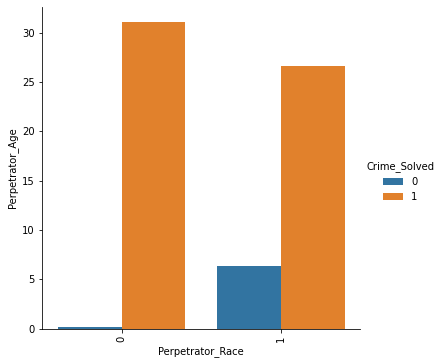

In [69]:
plt.figure(figsize=(10, 8))
sns.catplot(data=model_df,x='Perpetrator_Race',y='Perpetrator_Age',kind='bar',hue="Crime_Solved", ci = None)
plt.xticks(rotation = 90)

**Fig. 11** Bar Chart Comparison of Important Attribute Perpetrator Age against Perpetrator Race

In [70]:
model_df.Perpetrator_Race.value_counts()

0    423937
1    214516
Name: Perpetrator_Race, dtype: int64

Using the information derived from in the value_counts done in the cleanup field the values of **Fig 11** are:
- 1 [Black] = 214516 
-0 [All other races] = 423937

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

<Figure size 720x576 with 0 Axes>

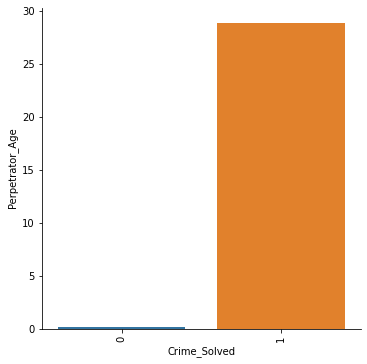

In [71]:
plt.figure(figsize=(10, 8))
sns.catplot(data=model_df,x= 'Crime_Solved',y= 'Perpetrator_Age', kind='bar', ci = None)
plt.xticks(rotation = 90)

**Fig. 12** Bar Chart Comparison of Important Attribute Perpetrator Age against the desired outcome Crim Solved

It can be seen in **Fig 12** that Perpetrator Age on its own is a poor indicator of outcome as the range of solved crimes is far greater than unsolved crimes across the perpetrator age range. 

Perpetrator Age in **Fig 11** and **Fig 12** show a discrepancy most likely caused by overfitting and / or data leakage.  This will need to be revisited in the next release of the model. 

# Appendix


### Suggested next steps to improve the important attriubute improve future case outomes 

1. Victim Age shows that unsolved crimes occur across all age groups
- Advised that self-defense and victim training be rolled out beginning at younger ages 
- This should result in a change in the victimology and victim ranges

2. Perpetrator Age and Race showed that in Black communities cases involving younger perpetrators are more often unsolved
- This hints at a bias in law enforcement to avoid viewing younger persons as the perpetrators. Improved training in profiling and perpetrator classification may help in improving case outcomes
- Community outreach and increased domestic support in schools and communities of colour would aim to decrease crime and identify potential perpetrators early to avoid them becoming a danger to themselves and others

### Next Steps / Stretch Clean up 

- The Data required more clean up than anticipated 
- Due to the unusually high accuracy measures it is assumed that there is a bug in the data and there is data leakage occurring that has not yet been identified. 
- The data cleanup needs to be revisited for more accurate models to be developed. 
- The Year column was dropped as it skewed the models, but it would be worth it to clear and revisit 